In [1]:
(* Расширенный алгоритм Евклида для полиномов *)
myPolyBezout[aa_, bb_] := Module[
        {a = aa, b = bb, q, r},
        {x0, xx, y0, yy} = {1,0,0,1};               
        While[Not[SameQ[b, 0]],
            q = PolynomialQuotient[a,b,x];
            r = PolynomialRemainder[a,b,x];
            {a,b} = {b, r};
            {x0, xx} = {xx, ExpandAll[x0 - xx*q]};
            {y0, yy} = {yy, ExpandAll[y0 - yy*q]};
        ];
        {a, {x0, y0}}
];

In [3]:
f = 5*x^5 - 21*x^4 + 23*x^3 - 37*x^2 + 77*x - 7;
g = 10*x^4 - 42*x^3 + 56*x^2 - 26*x + 2;

In [5]:
myPolyBezout[f,g]

2                         2
{128 - 1408 x + 640 x , {-18 + 2 x, 1 + 9 x - x }}

2
               2   -5625 + 625 x  625 + 5625 x - 625 x
{1 - 11 x + 5 x , {-------------, ---------------------}}
                       40000              80000
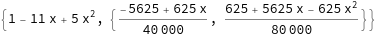

In [6]:
PolynomialExtendedGCD[f,g]

In [7]:
{myGCD, {myU, myV}} = myPolyBezout[f,g];
{wGCD, {wU, wV}} = PolynomialExtendedGCD[f,g,x];

In [9]:
(* Сравнение НОД с f*u + g*v *)
FullSimplify[myGCD == f*myU + g*myV]

True

In [11]:
(* Получение значения коэффициента при высшей степени x *)
lastCoef[poly_] := Coefficient[
    poly, x, Exponent[poly, x]
]

In [13]:
(* Сравнение моего GCD и полученного Wolfram с нормализацией *)
FullSimplify[myGCD / lastCoef[myGCD] == wGCD / lastCoef[wGCD]]

True